# Analyse exploratoire du jeu de données BRFSS 2015 — Diabète

Le fichier `diabetes_binary_health_indicators_BRFSS2015.csv` est un jeu de données
on peut lire sur kaggle qu'il est propre ( même si l'on vérifiera ça par la suite)
et contenant **253 680 réponses** à l'enquête BRFSS2015.  
La variable cible `Diabetes_binary` comporte deux classes :  
- `0` : absence de diabète  
- `1` : prédiabète ou diabète.  
Le jeu de données comprend **21 variables explicatives**.


L'on va se servir des objectifs et questions soulevés par les experts qui ont mené cette étude 
afin d'orienter notre approche, leur questions sont les suivantes : 

1) Les questions de l'enquête BRFSS permettent-elles de prédire avec précision si une personne est atteinte de diabète ?

2) Quels sont les facteurs de risque les plus prédictifs du risque de diabète ?

3) Peut-on utiliser un sous-ensemble de facteurs de risque pour prédire avec 
   précision si un individu est atteint de diabète ?

4) Peut-on créer une version abrégée des questions du BRFSS 
   en utilisant la sélection de caractéristiques pour prédire avec précision 
   si une personne est susceptible d'avoir le diabète ou présente un risque élevé de diabète ?"""


### Objectifs de l’étude exploratoire :
1. Visualiser les données.  
2. Étudier les caractéristiques de chaque variable (nom, type).  
3. Examiner les données manquantes.    
4. Évaluer l’utilité des variables pour la tâche de prédiction.  
5. Étudier la corrélation entre les variables.  
6. Proposer d’éventuelles transformations à réaliser.  

---


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Etape 1 : Visualisation globale et contexte du dataset

In [ ]:
## gestion du chemin pour que cela soit portable 

github_path = Path.cwd().parent / "data" / "diabetes_binary_health_indicators_BRFSS2015.csv"
local_path = Path.cwd().parents[1] / "Diabete" / "diabetes_binary_health_indicators_BRFSS2015.csv"

if github_path.exists():
    data_path = github_path
    print(" Fichier trouvé (GitHub structure) :", data_path.resolve())
elif local_path.exists():
    data_path = local_path
    print(" Fichier trouvé (local structure) :", data_path.resolve())
else:
    raise FileNotFoundError(
        " Le fichier CSV est introuvable.\n"
    )

In [ ]:
def load_data_and_description(filepath: str):
    
    filepath = Path(filepath)
    
    df = pd.read_csv(filepath)
    print(f"Dataset CSV chargé : {df.shape[0]} lignes, {df.shape[1]} colonnes")
    
    # on examine les 5 premières lignes du dataSet via la methode head()  
    print(df.head())

    # la methode info() nous permet d'obtenir une description des données ( nb de lignes, type des variables et le nb de val non-nulles)
    print(df.info())

    # on constate qu'il n'y a que des feautres de type float représentant des proportions  
    # Histogrammes pour chacune des features 

    cols = [
        "Diabetes_binary", "HighBP", "HighChol", "CholCheck", "BMI", "Smoker",
        "Stroke", "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
        "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "GenHlth",
        "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"
    ]

    plt.figure(figsize=(20,20))

    for i,cols in enumerate(cols,1): 
        plt.subplot(6,4,i)   # 24 emplacement à l'écran
        plt.hist(df[cols],bins=20,edgecolor='black')
        plt.title(cols, fontsize=10)  
        plt.xlabel("")
        plt.ylabel("Fréquence")
    
    plt.subplots_adjust(hspace=0.8, wspace=0.6)  #  espace entre les lignes et colonnes
    plt.show()

    # Affichage de la proportion de diabétique
    
    first_col = df.iloc[:,0]
    nb_diabetiques = (1/len(df))*np.sum(first_col == 1)
    print("Le pourcentage de diabétique est de",nb_diabetiques*100,"%")


    return df


 Fichier trouvé (local structure) : C:\IMT\2A\introML\projetML\Diabete\diabetes_binary_health_indicators_BRFSS2015.csv


Dataset CSV chargé : 253680 lignes, 22 colonnes


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0



=== Informations générales ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth             

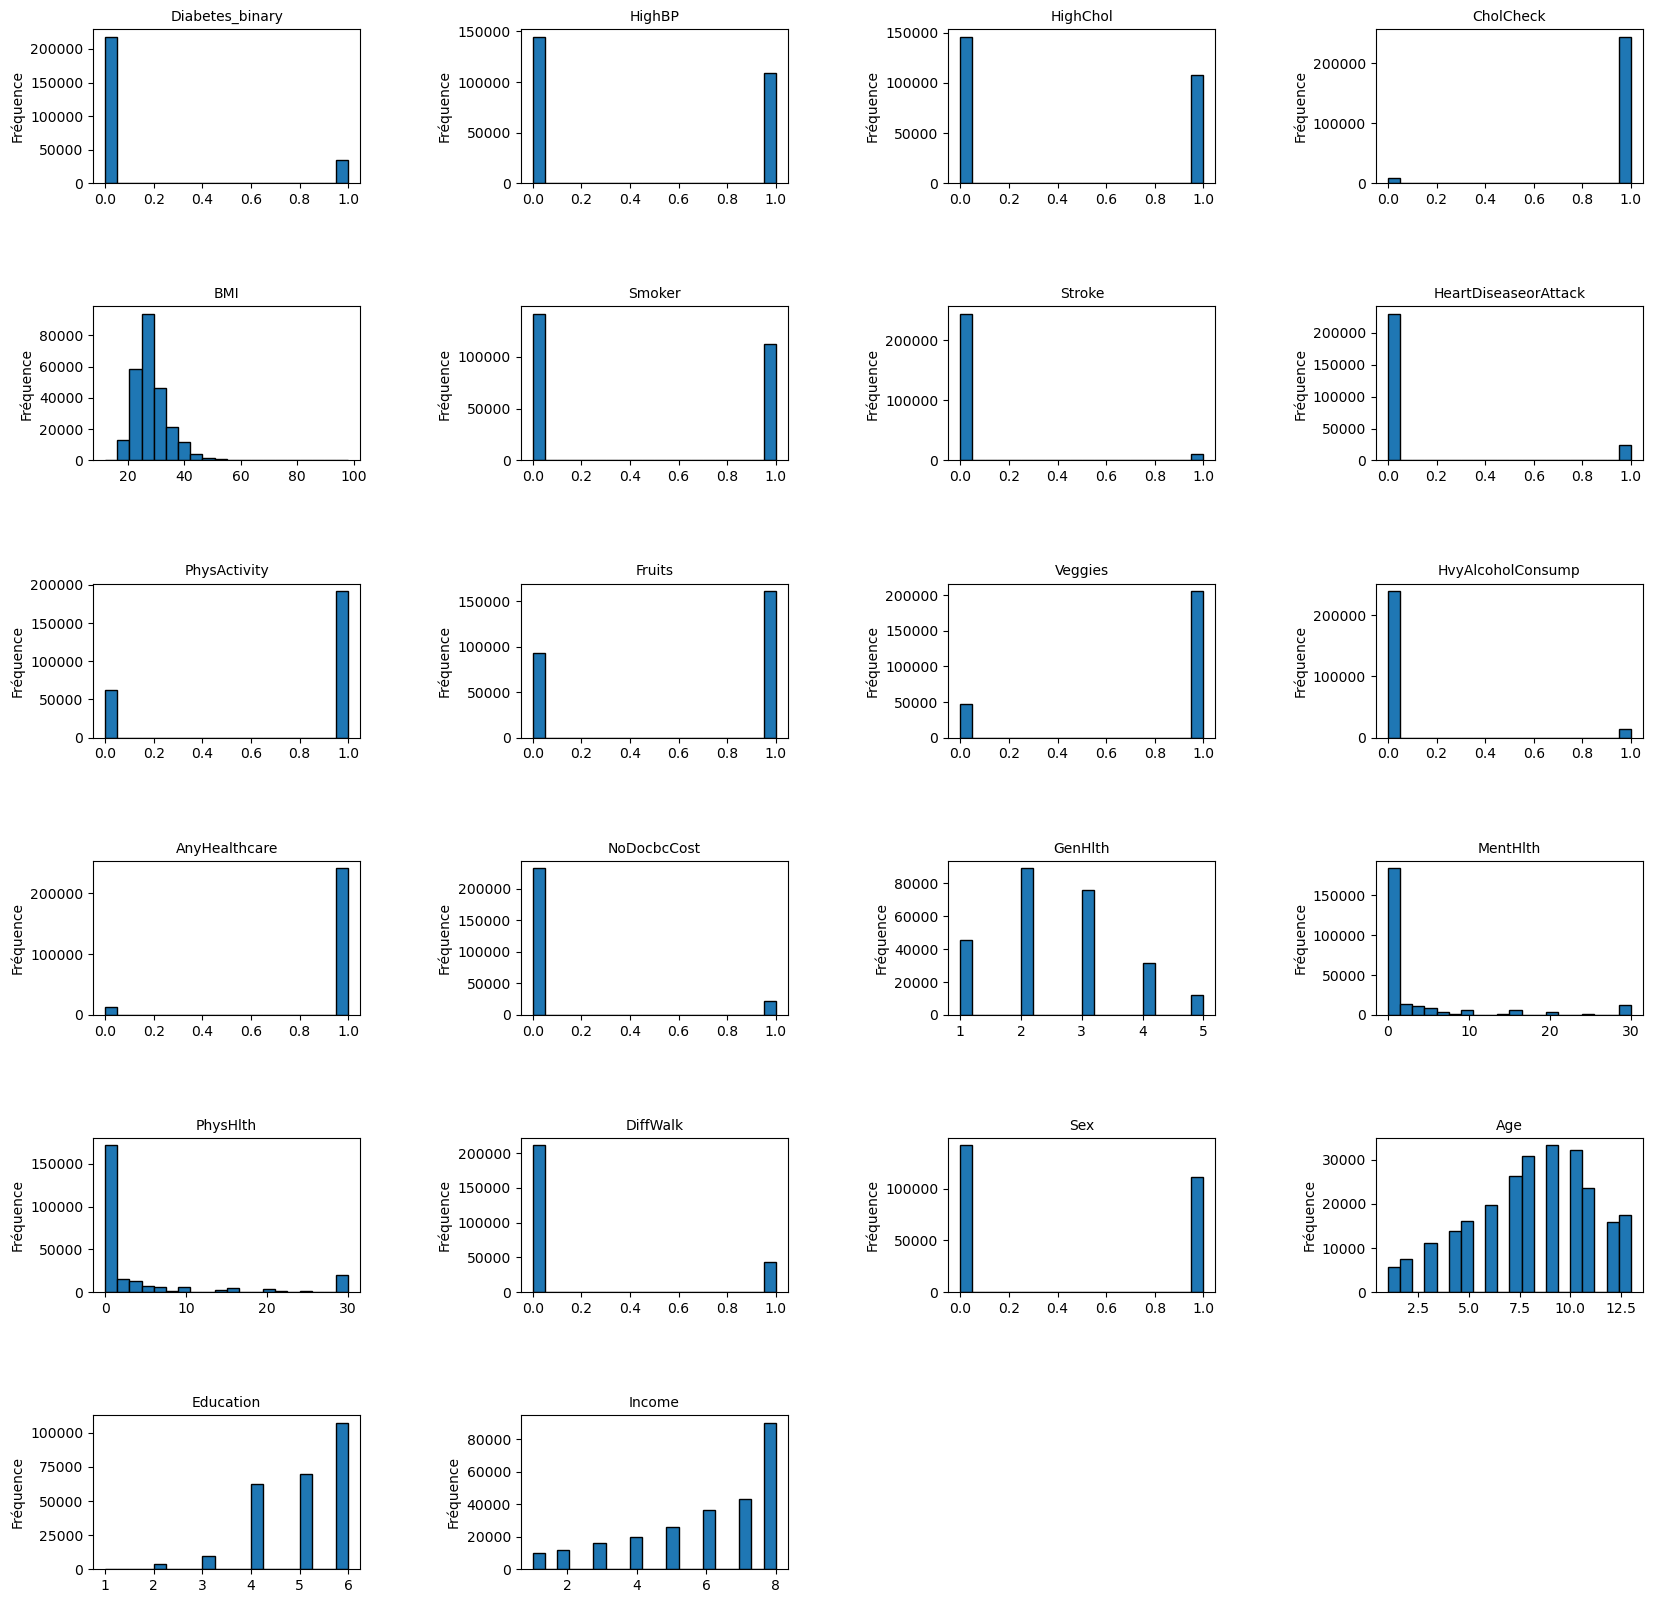

Le pourcentage de diabétiques est : 13.93%


In [ ]:
## Chargement du dataset 
df = load_data_and_description(data_path)

### Premières observations

- Pas de **valeurs manquantes**  pas de complétion nécessaire ( ça on le savait déjà).  
- 22 colonnes, toutes de type **float**.  
- Pas de données bruitées visibles.  
- Environ **250 000 lignes**, ce qui en fait un jeu de données assez volumineux.  
- La proportion de diabétiques est d’environ **14 %**, ce qui montre un **déséquilibre** des classes.  
  donc Il faudra adapter la méthode d’entraînement (pondération, sur-échantillonnage, etc.).  
- On peut également observer certaines proportions via les histogrammes


## Etape 2 : L'analyse des features 

In [33]:
## matrice de corrélation des variables

corr_matrix = df.corr()

print(" Matrice de corrélation calculée :")
print(corr_matrix.shape)
display(corr_matrix)
 

 Matrice de corrélation calculée :
(22, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,...,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


La matrice de corrélation est de taille 22×22, on va donc se limiter aux 10 features les plus corrélées

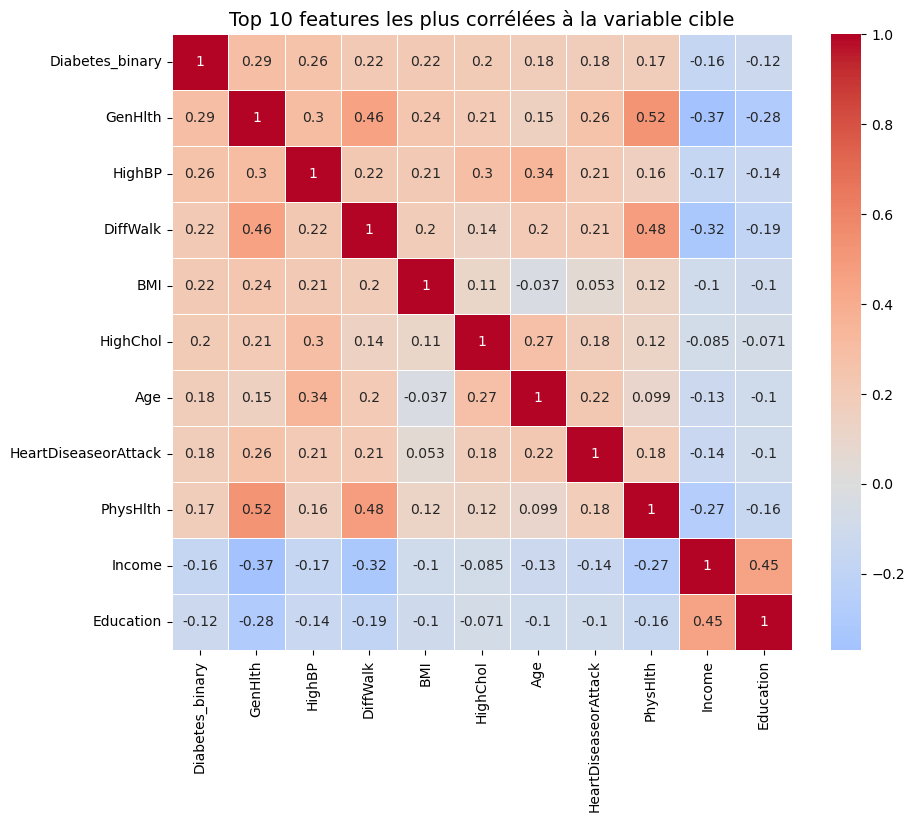

In [ ]:
import seaborn as sns

# Sélection des 10 variables les plus corrélées à la cible
topk_features = (
    corr_matrix["Diabetes_binary"].abs().sort_values(ascending=False).head(11).index
)

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix.loc[topk_features, topk_features],
    annot=True,
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Top 10 features les plus corrélées à la variable cible", fontsize=14)
plt.show()


In [37]:
##Pour plus de clarté on affiche le score des 10 paires les plus corrélées

# on extraction des corrélations sous forme de tableau long
corr_pairs = (corr_matrix.unstack().reset_index().rename(columns={"level_0": "Feature1", "level_1": "Feature2", 0: "Correlation"}))

corr_pairs = corr_pairs[corr_pairs["Feature1"] != corr_pairs["Feature2"]]
corr_pairs["AbsCorr"] = corr_pairs["Correlation"].abs()

# Tri par corrélation absolue décroissante
top_corr = corr_pairs.sort_values("AbsCorr", ascending=False).head(10)

print(" Top 10 des paires de variables les plus corrélées (en valeur absolue) :")
display(top_corr)


 Top 10 des paires de variables les plus corrélées (en valeur absolue) :


,Feature1,Feature2,Correlation,AbsCorr
366,PhysHlth,GenHlth,0.524364,0.524364
324,GenHlth,PhysHlth,0.524364,0.524364
390,DiffWalk,PhysHlth,0.478417,0.478417
369,PhysHlth,DiffWalk,0.478417,0.478417
325,GenHlth,DiffWalk,0.456920,0.456920
388,DiffWalk,GenHlth,0.456920,0.456920
482,Income,Education,0.449106,0.449106
461,Education,Income,0.449106,0.449106
329,GenHlth,Income,-0.370014,0.370014
476,Income,GenHlth,-0.370014,0.370014


### Commentaires : 

- La matrice de corrélation montre plusieurs dépendances fortes entre certaines variables (ex. HighBP et HeartDiseaseorAttack).
- Les 10 paires les plus corrélées indiquent une redondance possible entre certains indicateurs de santé.
- On remarque égalment que les 8 premieres sont très corrélées
- Ces observations orienteront la **sélection de features** et la **réduction de dimension** avant entraînement.


### Etape 3 : Reduction de dimension ( PCA ) 
    On fait ça ici pour visualiser les data, et poursuivre l'étape précédente. En revanche elle sera éventuellement pour 
    certains algorithmes 

In [41]:
## La PCA est sensible à l’échelle des variables :
# on veut éviter qu’une feature avec des valeurs grandes (ex : BMI) domine la variance.

from sklearn.preprocessing import StandardScaler

# Séparation des features et de la cible
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"]

# Standardisation (moyenne = 0, variance = 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(" Données standardisées :",
      "Moyenne (approx) :",X_scaled.mean().round(2),
      "et écart-type (approx) :",X_scaled.std().round(2))



 Données standardisées : Moyenne (approx) : 0.0 et écart-type (approx) : 1.0


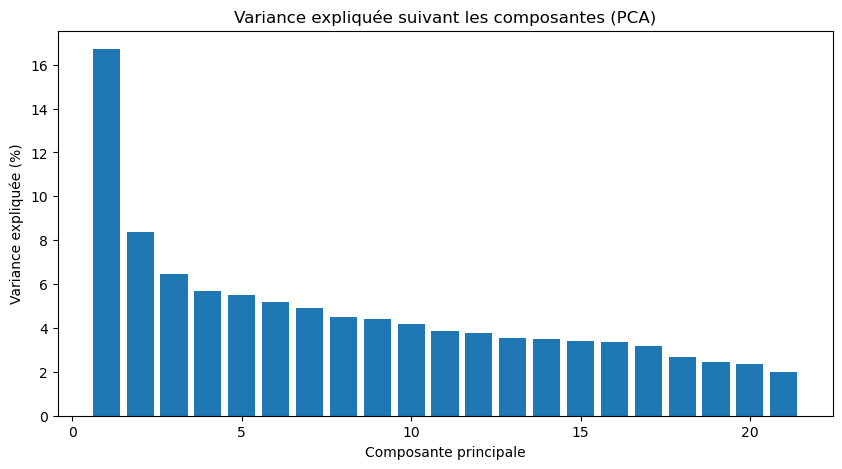

PC1 : 16.71%  |  PC2 : 8.40%
Variance cumulée (PC1+PC2) : 25.11%
PC1 : 16.71%  |  PC2 : 8.40%|  PC3 : 6.48%
Variance cumulée (PC1+PC2+PC3) : 31.59%


In [50]:
## Application de la PCA 

from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# on commence avec toutes les composantes
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance expliquée par chaque composante via explained_variance_ratio_
explained_var = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_var) + 1), explained_var * 100)
plt.xlabel("Composante principale")
plt.ylabel("Variance expliquée (%)")
plt.title("Variance expliquée suivant les composantes (PCA)")
plt.show()

# Affiche les 2 premières composantes
print(f"PC1 : {explained_var[0]*100:.2f}%  |  PC2 : {explained_var[1]*100:.2f}%")
print(f"Variance cumulée (PC1+PC2) : {explained_var[:2].sum()*100:.2f}%")

# Affiche les 3 premières composantes
print(f"PC1 : {explained_var[0]*100:.2f}%  |  PC2 : {explained_var[1]*100:.2f}%|  PC3 : {explained_var[2]*100:.2f}%")
print(f"Variance cumulée (PC1+PC2+PC3) : {explained_var[:3].sum()*100:.2f}%")


Commentaire : On remarque qu'ici seule la première composante est prépondérante, les 3 composantes principales capturent ~32% de la variance des variables initiales : c'est peu.
### Regardons plus en détails l'importance de chaque features ( contribution aux axes PCA )

In [44]:
 # Matrice des poids (loadings) via pca.components_
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(pca.components_))],
    index=X.columns
)

# Importance des features sur les 2 premières composantes
importance_pc1 = loadings["PC1"].abs().sort_values(ascending=False).head(10)
importance_pc2 = loadings["PC2"].abs().sort_values(ascending=False).head(10)
importance_pc3 = loadings["PC3"].abs().sort_values(ascending=False).head(10)

print(" les 10 features qui contribuent le plus à PC1 :")
display(importance_pc1)

print(" les 10 features qui contribuent le plus à PC2 :")
display(importance_pc2)

print(" les 10 features qui contribuent le plus à PC3 :")
display(importance_pc3)


 les 10 features qui contribuent le plus à PC1 :


GenHlth                 0.405406
DiffWalk                0.358398
PhysHlth                0.343743
Income                  0.320321
Education               0.258411
HighBP                  0.256439
PhysActivity            0.237259
MentHlth                0.223139
HeartDiseaseorAttack    0.218694
HighChol                0.191361
Name: PC1, dtype: float64

 les 10 features qui contribuent le plus à PC2 :


Age                     0.469535
AnyHealthcare           0.367351
NoDocbcCost             0.355700
HighBP                  0.321065
HighChol                0.312943
MentHlth                0.255045
CholCheck               0.239608
HeartDiseaseorAttack    0.235006
Income                  0.190146
Fruits                  0.159547
Name: PC2, dtype: float64

 les 10 features qui contribuent le plus à PC3 :


Fruits          0.509849
Veggies         0.461041
Sex             0.436829
PhysHlth        0.268187
MentHlth        0.239319
DiffWalk        0.195368
Smoker          0.191457
Education       0.189173
PhysActivity    0.136408
NoDocbcCost     0.114549
Name: PC3, dtype: float64

In [49]:
## Plus globalement, fixons la variance à 90% et trouvons le nb optimal de dimensions

pca_90 = PCA(0.90)
X_reduced90 = pca_90.fit_transform(X_scaled)

print(f"Nombre de composantes retenues pour 95% de variance : {pca_90.n_components_}")
print(f"Nombre de features concervées  : {X_reduced90.shape[1]}")


## Si l'on veut concerver 95% de la variance 

pca_95 = PCA(0.95)
X_reduced95 = pca_95.fit_transform(X_scaled)

print(f" Nombre de composantes retenues pour 95% de variance : {pca_95.n_components_}")
print(f"Nombre de features concervées : {X_reduced95.shape[1]}")


Nombre de composantes retenues pour 95% de variance : 17
Nombre de features concervées  : 17
 Nombre de composantes retenues pour 95% de variance : 19
Nombre de features concervées : 19


### Résultats obtenus suite à la PCA : 

Pour expliquer 90% et respectivement 95% de la variance totale, la 
PCA retient 17 et 19 composantes principales selon les réglages effectués.
Autrement dit, la quasi-totalité des dimensions originales sont nécessaires 
pour préserver l’information statistique initiale. Finalement,
les variables du jeu de données sont faiblement redondantes, chacune apporte une contribution spécifique.
On pourrait réduire raisonnablement le nombre de variables de 1 ou 2 sans perdre 
trop d'information ( mais ça ne serait a priori un grand gain sur nos algos lors de l'étape d'entrainement ...)



Ce notebook va etre ajoutée dans une autre branche pour test la visualisation sur d autres modeles 

In [4]:
print(" test ")


 test 


In [5]:
test ezfjioz"jgergergeger 

SyntaxError: invalid syntax (120837099.py, line 1)